In [1]:
import os
import pandas as pd
# regionprops
from skimage.measure import regionprops

dir = r"D:\colocalization_data"

vgat = {}
vglut = {}

for root, dirs, files in os.walk(dir):
    for file in files:
        if file.endswith(".csv"):
            if file != "VGluT3_colocalization.csv" and file != "VGaT_colocalization.csv":
                df = pd.read_csv(os.path.join(root, file))
                name = file.split(".")[0].replace("_", " ").replace("colocalization", "")
                if "VGaT" in name:
                    vgat[name.replace("VGaT", "")] = {
                        "amount": len(df),
                        "area": df["area µm^2"].sum() / len(df)
                    }
                elif "VGluT3" in name:
                    vglut[name.replace("VGluT3", "")] = {
                        "amount": len(df),
                        "area": df["area µm^2"].sum() / len(df)
                    }

vgat = pd.DataFrame(vgat).T
vgat.columns = ["amount", "area"]
vglut = pd.DataFrame(vglut).T
vglut.columns = ["amount", "area"]
             

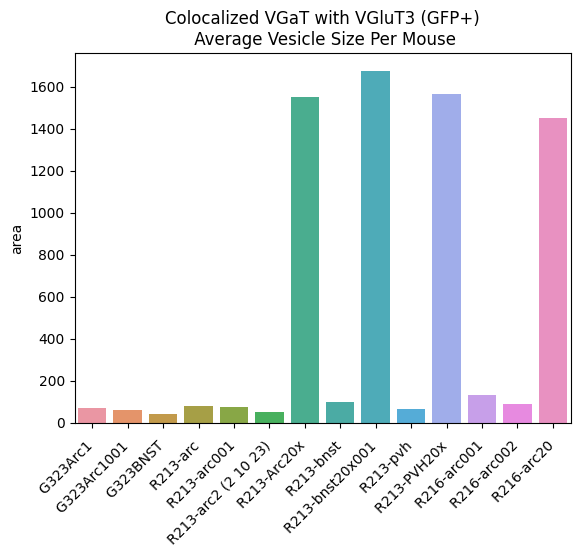

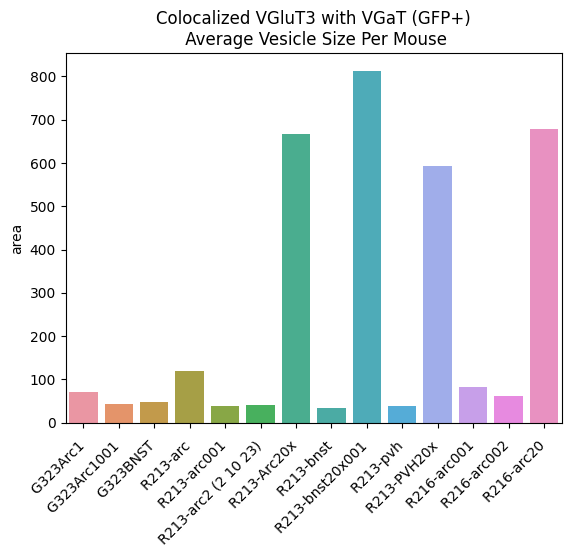

In [2]:
from turtle import title
import matplotlib.pyplot as plt
import seaborn as sns

# plot the amount of VGaT and VGluT3 for each region
sns.color_palette("muted")

# create sns barplot for VGaT colo with VGluT3 
x = sns.barplot(x=vgat.index, y=vgat["area"])
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
x.set_title("Colocalized VGaT with VGluT3 (GFP+)\n Average Vesicle Size Per Mouse")
plt.show()

# create sns barplot for VGluT3 colo with VGaT
y = sns.barplot(x=vglut.index, y=vglut["area"])
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
y.set_title("Colocalized VGluT3 with VGaT (GFP+)\n Average Vesicle Size Per Mouse")

# show the plots
plt.show()


## 20x resolution seems like an outlier.
![Artifacts](https://imgs.xkcd.com/comics/artifacts.png)

lets look at some of the labeling for the 20x resolution


Text(0.5, 1.0, 'VGaT Labels')

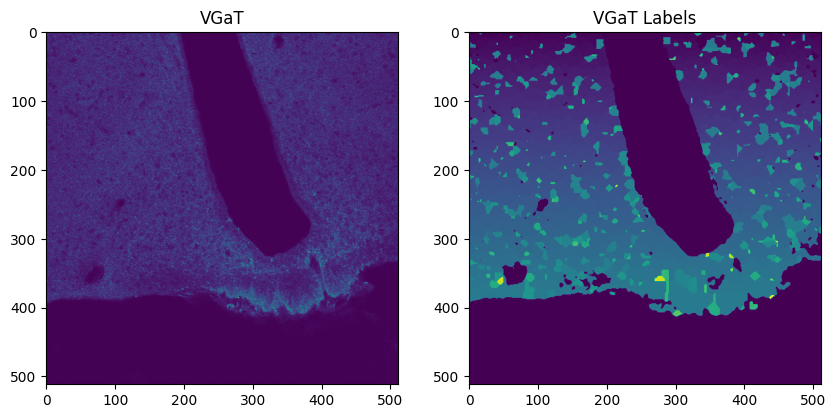

In [3]:
from skimage import io
vgat_20x = r"D:\colocalization_data\R213-Arc20x\layers\VGaT.tiff"
vgat_20x_labels = r"D:\colocalization_data\R213-Arc20x\layers\VGaT_labels.tiff"

# read the image
vgat_20x = io.imread(vgat_20x)
vgat_20x_labels = io.imread(vgat_20x_labels)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(vgat_20x[0])
ax[0].set_title("VGaT")

ax[1].imshow(vgat_20x_labels[0])
ax[1].set_title("VGaT Labels")


## The labeling at this resolution seems to be very bad, we'll ignore this resolution for now.

In [4]:
MICE_TO_REMOVE = [
"R213-Arc20x",
"R213-bnst20x001",
"R213-PVH20x",
"R216-arc20"
]
print(len(vgat), len(vglut))
vgat.index = [mouse.strip(" ") for mouse in vgat.index]
vglut.index = [mouse.strip(" ") for mouse in vglut.index]

vgat.drop([mouse for mouse in MICE_TO_REMOVE], inplace=True)
vglut.drop([mouse for mouse in MICE_TO_REMOVE], inplace=True)
print(len(vgat), len(vglut))



14 14
10 10


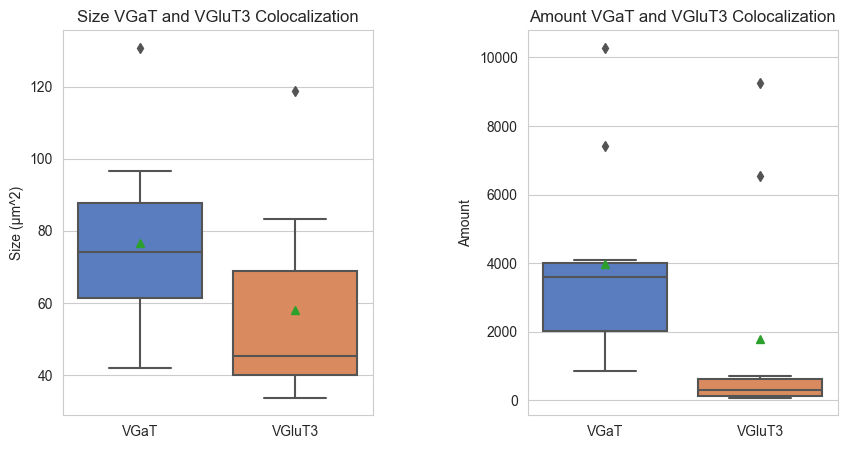

In [5]:
sns.color_palette("muted")
sns.set_style("whitegrid")
# merge the dataframes
colocalization = pd.merge(vgat, vglut, left_index=True, right_index=True)
# rename the columns
colocalization.columns = ["VGaT amount", "VGaT area", "VGluT3 amount", "VGluT3 area"]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# spacing between subplots
fig.subplots_adjust(wspace=0.5)


# create a dataframe with the VGaT area and VGluT3 area 
vgat_vglut = pd.DataFrame({
    "VGaT": colocalization["VGaT area"],
    "VGluT3": colocalization["VGluT3 area"]
})

# create a boxplot for the VGaT area and VGluT3 area
sns.boxplot(data=vgat_vglut, ax=ax[0], palette="muted", showmeans=True)
ax[0].set_ylabel("Size (µm^2)")
ax[0].set_title("Size VGaT and VGluT3 Colocalization")

# create a dataframe with the VGaT amount and VGluT3 amount 
vgat_vglut = pd.DataFrame({
    "VGaT": colocalization["VGaT amount"],
    "VGluT3": colocalization["VGluT3 amount"]
})

# create a boxplot for the VGaT amount and VGluT3 amount
sns.boxplot(data=vgat_vglut, ax=ax[1], palette="muted", showmeans=True)
# y label to amount
ax[1].set_ylabel("Amount")
ax[1].set_title("Amount VGaT and VGluT3 Colocalization")

# show the plots
plt.show()


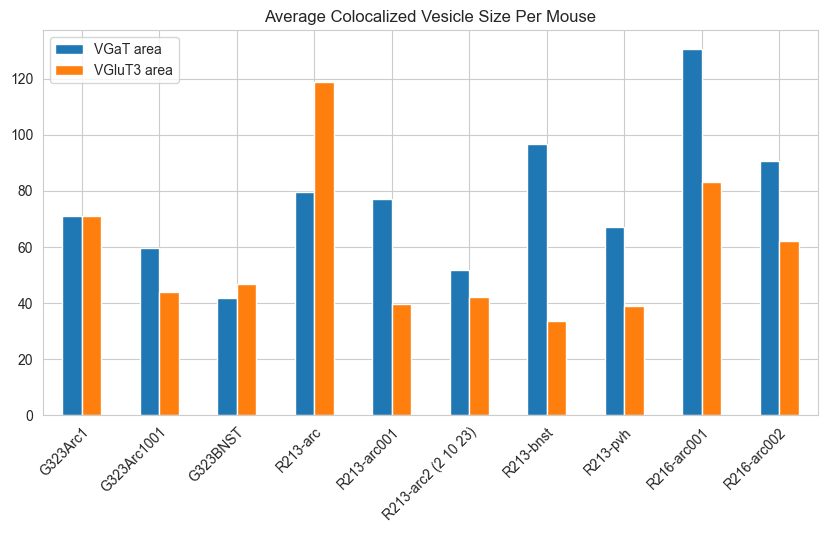

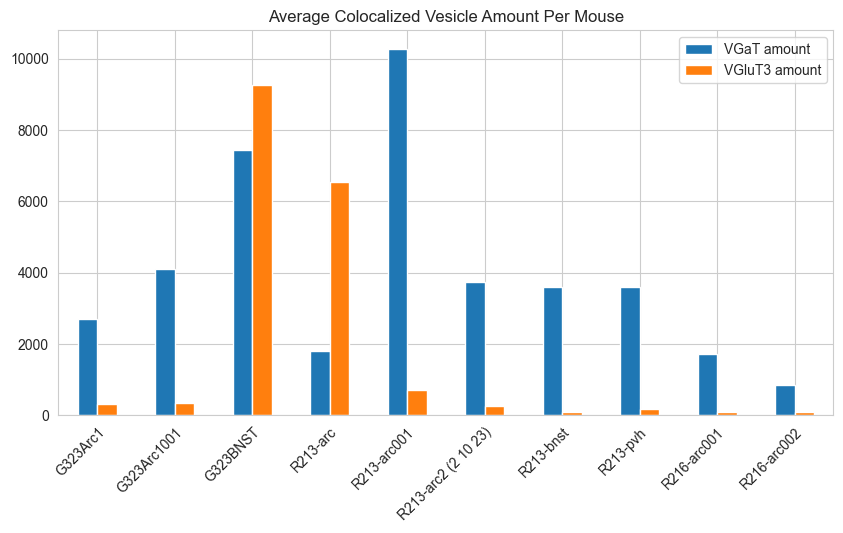

In [6]:
sns.color_palette("muted")
# merge the dataframes
colocalization = pd.merge(vgat, vglut, left_index=True, right_index=True)
# rename the columns
colocalization.columns = ["VGaT amount", "VGaT area", "VGluT3 amount", "VGluT3 area"]

# create a grouped barplot for the area of each colocalization sns
colocalization[["VGaT area", "VGluT3 area"]].plot(kind="bar", figsize=(10, 5), title="Average Colocalized Vesicle Size Per Mouse")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
# create a grouped barplot for the amount of each colocalization
colocalization[["VGaT amount", "VGluT3 amount"]].plot(kind="bar", figsize=(10, 5), title="Average Colocalized Vesicle Amount Per Mouse")
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")

plt.show()


## R13-arc001 seems to have a way higher VGaT/VGluT3 colocalization ration than the other samples.

lets open it up

arc vs pvh

Vgat vglut distance


In [7]:
import napari
from nd2reader import ND2Reader

viewer = napari.Viewer()
# set the napari reader
import os
for file in os.listdir(r"D:\colocalization_data\G323Arc1001\layers"):
    if file.endswith(".tiff"):
        viewer.open(r"D:\colocalization_data\G323Arc1001\layers\{}".format(file))
        print(file)


DAPI.tiff
DAPI_binary.tiff
DAPI_labels.tiff
dapi_otsu_threshold.tiff
DAPI_segmentation.tiff
EGFP.tiff
EGFP_binary.tiff
EGFP_labels.tiff
egfp_otsu_threshold.tiff
EGFP_segmentation.tiff
VGaT.tiff
VGaT_binary.tiff
VGaT_labels.tiff
vgat_otsu_threshold.tiff
VGaT_segmentation.tiff
VGluT3.tiff
VGluT3_binary.tiff
VGluT3_labels.tiff
vglut3_otsu_threshold.tiff
VGluT3_segmentation.tiff
